In [13]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, Polygon
from shapely import affinity
import matplotlib.pyplot as plt
import contextily as ctx

In [14]:
gdf = gpd.read_file('../data/na_lakes/hydrography_p_lakes_v2.shp')

In [15]:
gdf.crs

<Projected CRS: PROJCS["Sphere_ARC_INFO_Lambert_Azimuthal_Equal_Ar ...>
Name: Sphere_ARC_INFO_Lambert_Azimuthal_Equal_Area
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Lambert Azimuthal Equal Area (Spherical)
Datum: Sphere_ARC_INFO
- Ellipsoid: Sphere_ARC_INFO
- Prime Meridian: Greenwich

In [16]:
gdf = gdf.to_crs(epsg=3857)
gdf = gdf.dropna()

In [17]:
gdf[gdf['NAMEEN'].str.contains('Cayuga')]

,OBJECTID,UIDENT,TYPE,COUNTRY,NAMEEN,NAMEFR,NAMESP,EDIT_DATE,EDIT,Shape_Leng,Shape_Area,geometry
1723,1724,304102,16,USA,Cayuga Lake,Cayuga Lake,Cayuga Lake,20060803,NEW,121524.695663,1.738421e+08,"POLYGON ((-8516745.109 5233131.893, -8518104.7..."


In [21]:
lake_bounds = gdf[gdf['NAMEEN'].str.contains('Cayuga')]['geometry'].unary_union
# lake_bounds = affinity.scale(lake_bounds, xfact=1.5, yfact=1)
# lake_bounds = affinity.translate(lake_bounds, xoff=3000.0, yoff=0)
# lake_bounds = affinity.rotate(lake_bounds, xoff=3000.0, yoff=0)

In [22]:
from pyproj import Transformer

def get_state_bounds(abbr):
    # get bounds for state and convert to epsg:3857
    usa = gpd.read_file('../data/states_21basic/states.shp')

    state_bounds = usa[usa.STATE_ABBR == abbr].total_bounds.reshape((2, 2))

    transformer = Transformer.from_crs("epsg:4326", "epsg:3857")

    state_bounds[0] = transformer.transform(state_bounds[0,1]-0.1, state_bounds[0,0]-0.1)
    state_bounds[1] = transformer.transform(state_bounds[1,1]+0.1, state_bounds[1,0]+0.1)
    
    return state_bounds

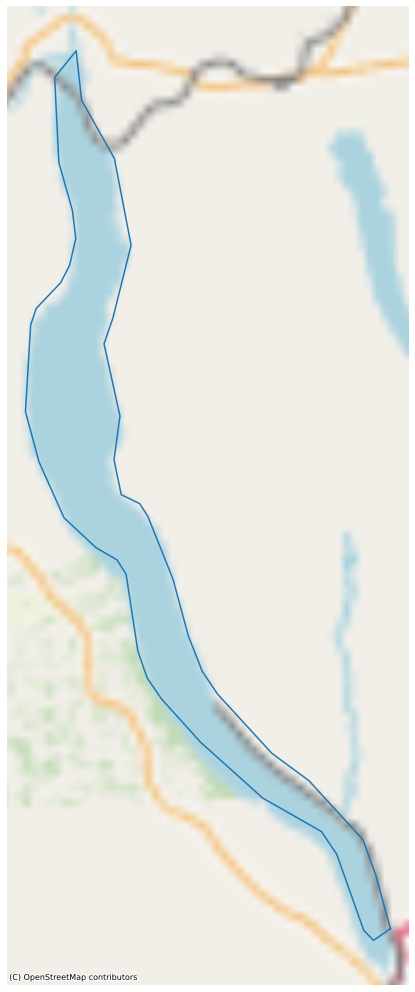

In [23]:
# ax = gdf[gdf['NAMEEN'].str.contains('Seneca')].plot(
#     figsize=(18, 18), 
#     label='Seneca Lake',
# )

fig= plt.figure(figsize=(18, 18))

ax = plt.plot(*lake_bounds.exterior.xy)
ax = plt.gca()

ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik, zoom=8)
ax.set_axis_off()